In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

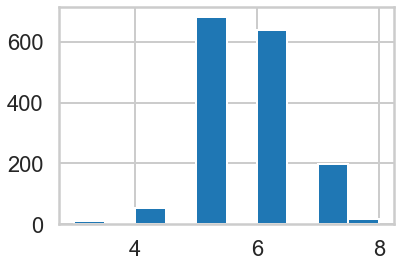

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.13660062565172054
% Good wines in Testing: 0.134375


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 1} 0.3883225852343598 {'mean_fit_time': array([0.00159388, 0.00197949, 0.00060039, 0.00099578, 0.00099716,
       0.00079536, 0.00120311, 0.0009974 , 0.00059814, 0.00059853,
       0.00099792, 0.00079846, 0.00079727, 0.00059786, 0.00059838,
       0.00099754, 0.00099807, 0.00059848, 0.00079751, 0.00079818,
       0.00099807, 0.0007977 , 0.00099735, 0.00079823, 0.00099745,
       0.00079813, 0.0011961 , 0.00099401, 0.00099797, 0.00079741,
       0.00099883, 0.00139384, 0.0011961 , 0.00099306, 0.00079837,
       0.00079532, 0.00099883, 0.00139313, 0.0015954 , 0.0007978 ,
       0.00099635, 0.00099936]), 'std_fit_time': array([7.94796824e-04, 1.25357477e-03, 4.90213330e-04, 1.48968690e-06,
       6.30751094e-04, 3.97712663e-04, 3.99125645e-04, 7.62939453e-07,
       4.88383298e-04, 4.88694713e-04, 1.07261866e-06, 3.99235082e-04,
       3.98637119e-04, 4.88151281e-04, 4.88577656e-04, 1.19685177e-06,
       1.53331139e-06, 4.88655601e-04,

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


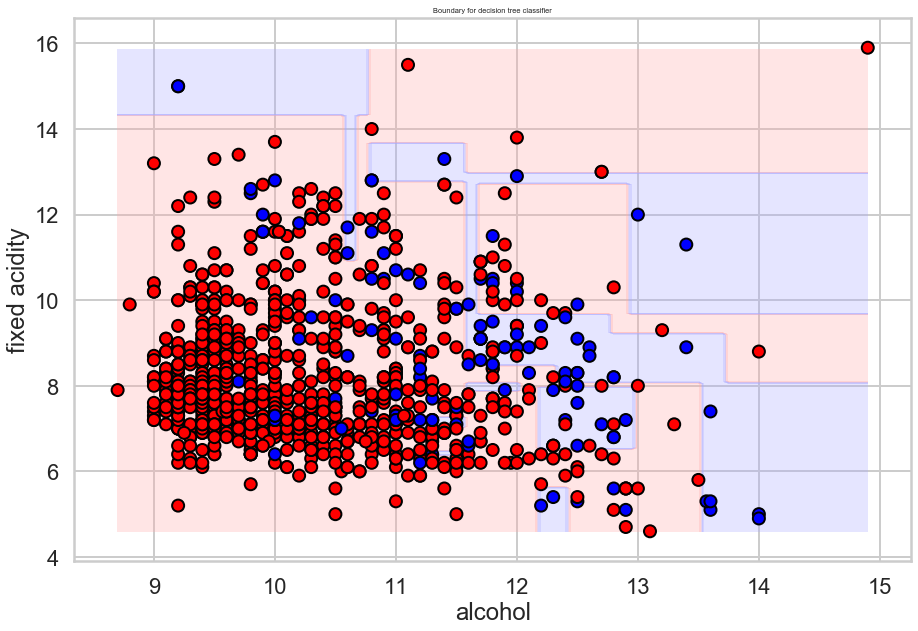

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

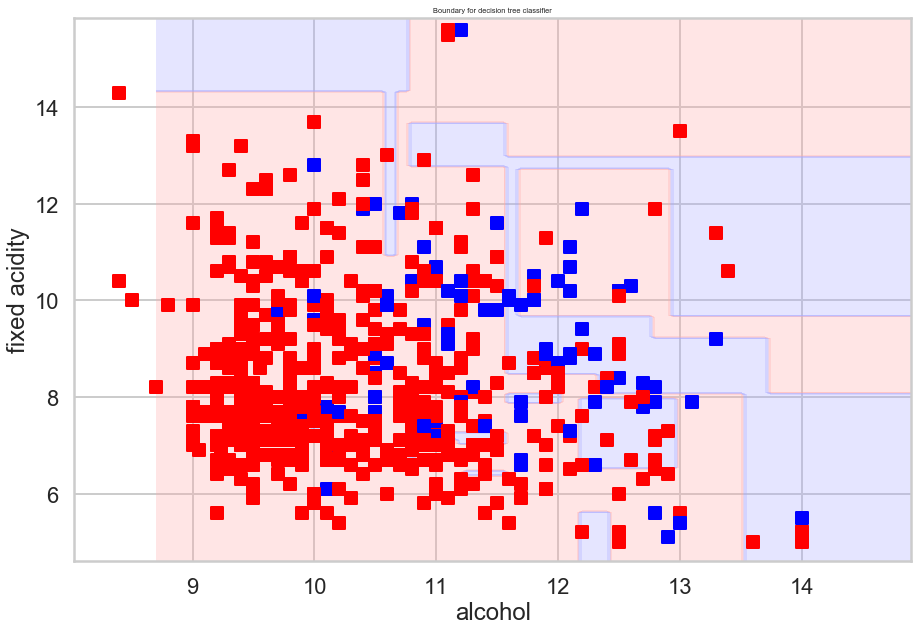

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 6} 0.30773290014737903 {'mean_fit_time': array([0.00179954, 0.00099554, 0.00079808]), 'std_fit_time': array([0.00075977, 0.00063076, 0.00039904]), 'mean_score_time': array([0.00178757, 0.00099721, 0.00079784]), 'std_score_time': array([0.00073566, 0.00063037, 0.00039892]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.0625    , 0.22857143, 0.23529412]), 'split1_test_score': array([0.22222222, 0.15384615, 0.30508475]), 'split2_test_score': array([0.36363636, 0.45833333, 0.48979592]), 'split3_test_score': array([0.3437

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


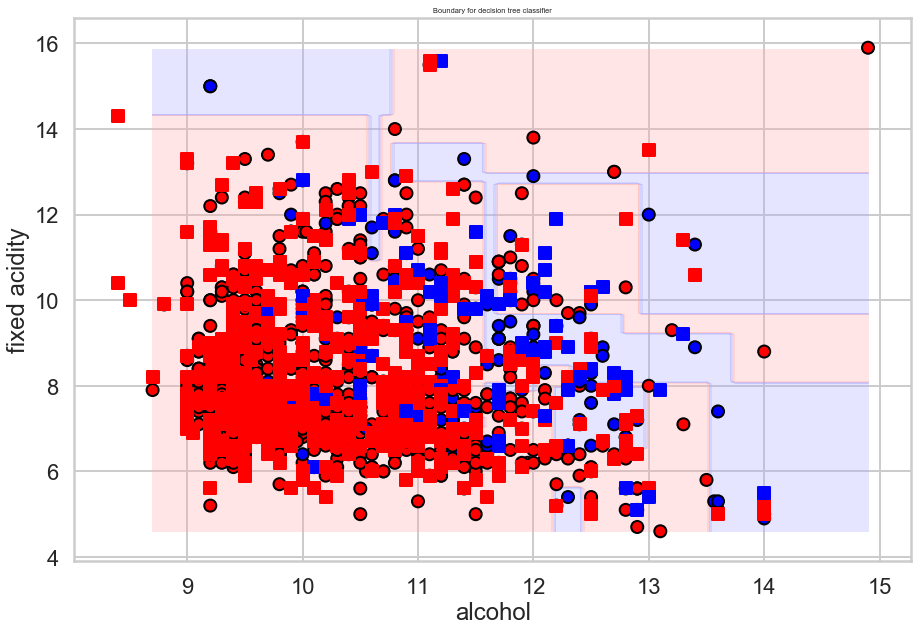

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 2, 'min_samples_leaf': 1} 0.4940804777136261 {'mean_fit_time': array([0.00179367, 0.0011961 , 0.00119834, 0.00099154, 0.00099921,
       0.00159869, 0.00140162, 0.00099907, 0.0013947 , 0.00118985,
       0.00199304, 0.00159507, 0.00179634, 0.00199313, 0.00239968,
       0.00199628, 0.00199323, 0.00179482, 0.00159698, 0.0019959 ,
       0.00259404, 0.00318694, 0.00319157, 0.00338907, 0.00259342,
       0.00259495, 0.00219407, 0.00259471, 0.00259171, 0.00259266,
       0.00379014, 0.00339088, 0.00219393, 0.00239344, 0.00359063,
       0.00318952, 0.00279136, 0.0029922 , 0.00299134, 0.00279217,
       0.00378923, 0.00399041, 0.00339036, 0.00379052, 0.0033905 ,
       0.00339065, 0.00338988, 0.00259414, 0.00239272, 0.00298996,
       0.00418859, 0.0027916 , 0.00299239, 0.00299101, 0.00279226,
       0.00279236, 0.00279226, 0.00279241, 0.00398927, 0.00378962,
       0.00478721, 0.00478702, 0.00478725, 0.00358982, 0.00298367,
       0.00339103, 0.00339046, 0.002

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 13} 0.4237449259808077 {'mean_fit_time': array([0.00339518, 0.00458183, 0.00678477, 0.00877638, 0.01136971,
       0.01835008, 0.0151597 , 0.02293868, 0.02533059, 0.02971539,
       0.02453418, 0.02812438, 0.03470721, 0.03350911, 0.02293839,
       0.02872314, 0.03430867, 0.03111343, 0.03091698]), 'std_fit_time': array([0.00150142, 0.00135289, 0.00074755, 0.00097713, 0.00048842,
       0.00569779, 0.00465207, 0.00089175, 0.00214669, 0.01169106,
       0.00522396, 0.00390903, 0.00097707, 0.00660386, 0.00089234,
       0.00547696, 0.00421259, 0.00640972, 0.00450466]), 'mean_score_time': array([0.00178981, 0.0018054 , 0.00159326, 0.0017952 , 0.00219421,
       0.00299263, 0.00239353, 0.00299296, 0.00279198, 0.00319967,
       0.00339112, 0.0029923 , 0.00359011, 0.00299339, 0.00279264,
       0.00339074, 0.0035903 , 0.00339403, 0.00299225]), 'std_score_time': array([3.96633137e-04, 4.04132491e-04, 7.96411312e-04, 3.98707686e-04,
       3.99208610e-04, 1.092

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


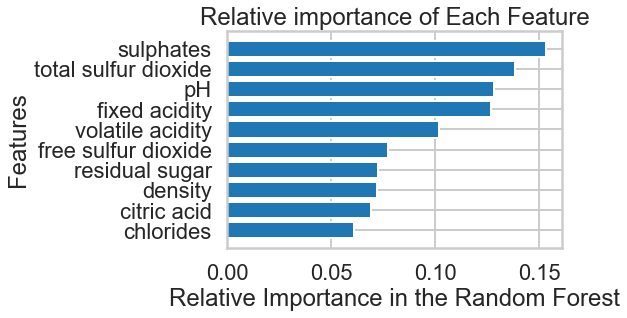

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'n_estimators': 58} 0.4075533746165231 {'mean_fit_time': array([0.02413483, 0.0313158 , 0.02313337, 0.0223423 , 0.0323123 ,
       0.04049087, 0.04527855, 0.03331141, 0.03889189, 0.03709836,
       0.03151174, 0.03430591, 0.03869619, 0.03969393, 0.05106444,
       0.04607816, 0.05944128, 0.05983982, 0.06302876, 0.05764575,
       0.06462831, 0.0676177 , 0.07340307, 0.05325761, 0.07140851,
       0.0684206 , 0.0801857 , 0.08277674, 0.08257842, 0.08417478,
       0.08138556, 0.09414701, 0.08058419, 0.09315085, 0.10751252,
       0.10571623, 0.09873381, 0.09036155, 0.10432034, 0.0943501 ,
       0.10831027, 0.10272508, 0.0915575 , 0.1105041 , 0.10950661,
       0.10930748, 0.08736677, 0.12486649, 0.12686005, 0.10392475]), 'std_fit_time': array([0.00330073, 0.00299864, 0.00410858, 0.00279172, 0.00407162,
       0.00279224, 0.00101656, 0.00354485, 0.00109149, 0.0059616 ,
       0.00101212, 0.00048884, 0.00429625, 0.00612857, 0.00039818,
       0.00720111, 0.00337387, 0.00413525, 0.000

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'max_depth': 3, 'n_estimators': 35} 0.4599037431892411 {'mean_fit_time': array([0.02693191, 0.02333746, 0.02234006, 0.02213969, 0.02134371,
       0.02274146, 0.02114224, 0.02473373, 0.02832446, 0.03131514,
       0.02553077, 0.02732716, 0.03111601, 0.02812452, 0.02633104,
       0.02812295, 0.02453427, 0.03350863, 0.03051362, 0.02592902,
       0.02573137, 0.02892246, 0.03590417, 0.03690019, 0.033708  ,
       0.03530431, 0.03350673, 0.0371048 , 0.04088702, 0.03869638,
       0.02113891, 0.02772622, 0.03051982, 0.03390708, 0.03769751,
       0.0376977 , 0.03909469, 0.03849673, 0.03889608, 0.03929443,
       0.03470688, 0.04128547, 0.04128923, 0.04148517, 0.0384974 ,
       0.03690453, 0.0355052 , 0.04508357, 0.04786921, 0.04986653,
       0.03530378, 0.03590317, 0.04128952, 0.05066657, 0.05066247,
       0.05325727, 0.06562438, 0.05624828, 0.05006571, 0.05186119,
       0.03171496, 0.03889537, 0.04208708, 0.04488015, 0.04009209,
       0.04208851, 0.04208698, 0.050865

c:\users\abhil\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

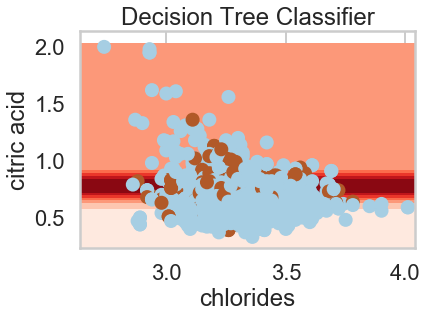

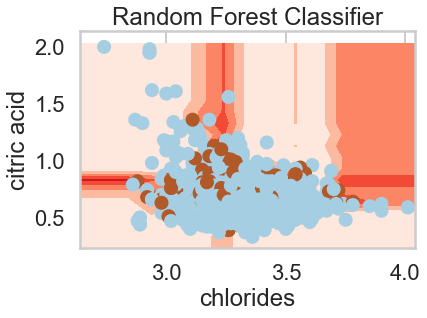

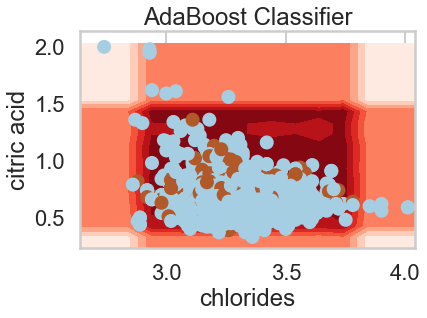

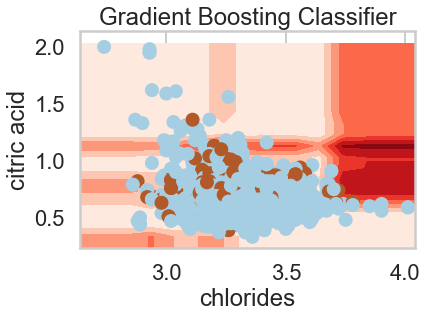

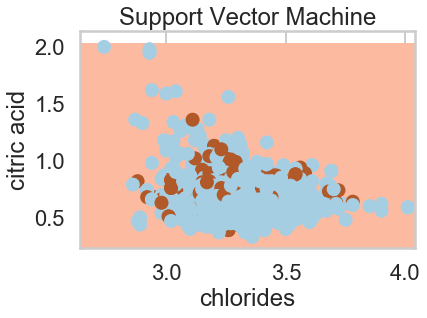

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1569    0
1570    0
1571    0
1572    0
1573    0
1574    0
1575    0
1576    0
1577    0
1578    0
1579    0
1580    0
1581    0
1582    0
1583    0
1584    1
1585    0
1586    0
1587    0
1588    0
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32